## DSI-06 Homework 9: ANSWERS
From Chapter 12, found on page 554-555 of ISLP

*Consider the `USArrests` data. We will now perform hierarchical clustering on the states.*

In [20]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import random

# Import specific objects
from ISLP import load_data
from ISLP.models import contrast
from ISLP.models import (ModelSpec as MS,
                         summarize)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

# Import, load, and show USArrests data
from statsmodels.datasets import get_rdataset
USArrests = get_rdataset('USArrests').data
USArrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


(a)  Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

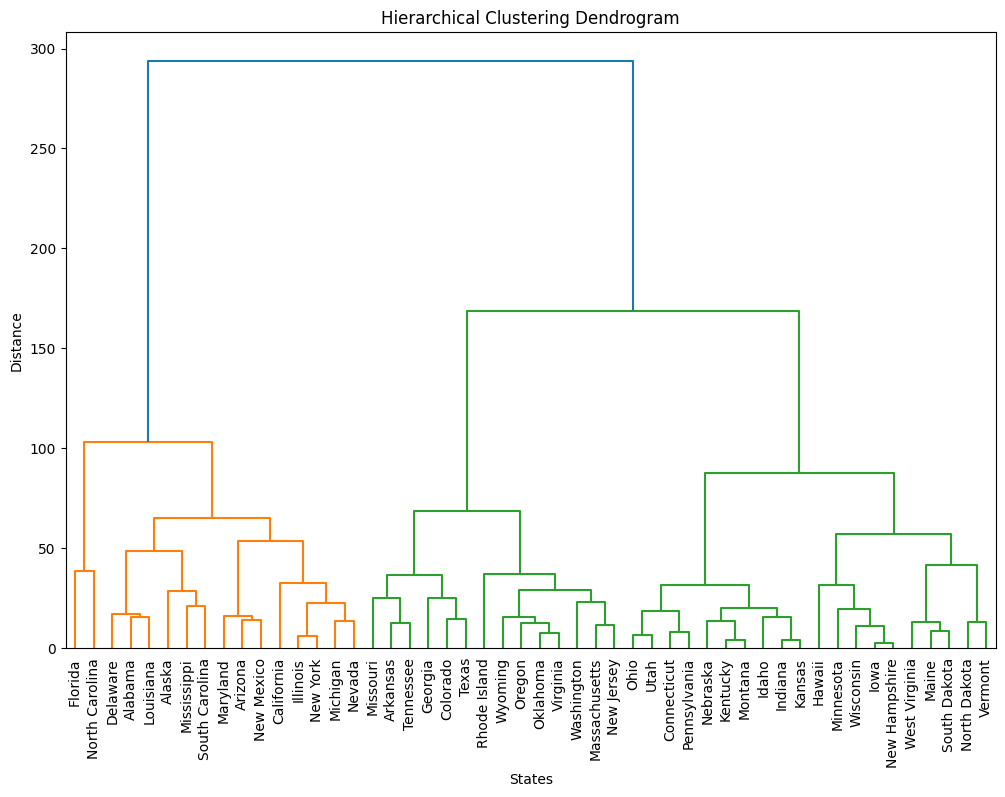

In [12]:
# Extract relevant features for clustering
features = USArrests

# Perform hierarchical clustering with complete linkage
linkage_matrix = linkage(features, method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=USArrests.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('States')
plt.ylabel('Distance')
plt.show()

(b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

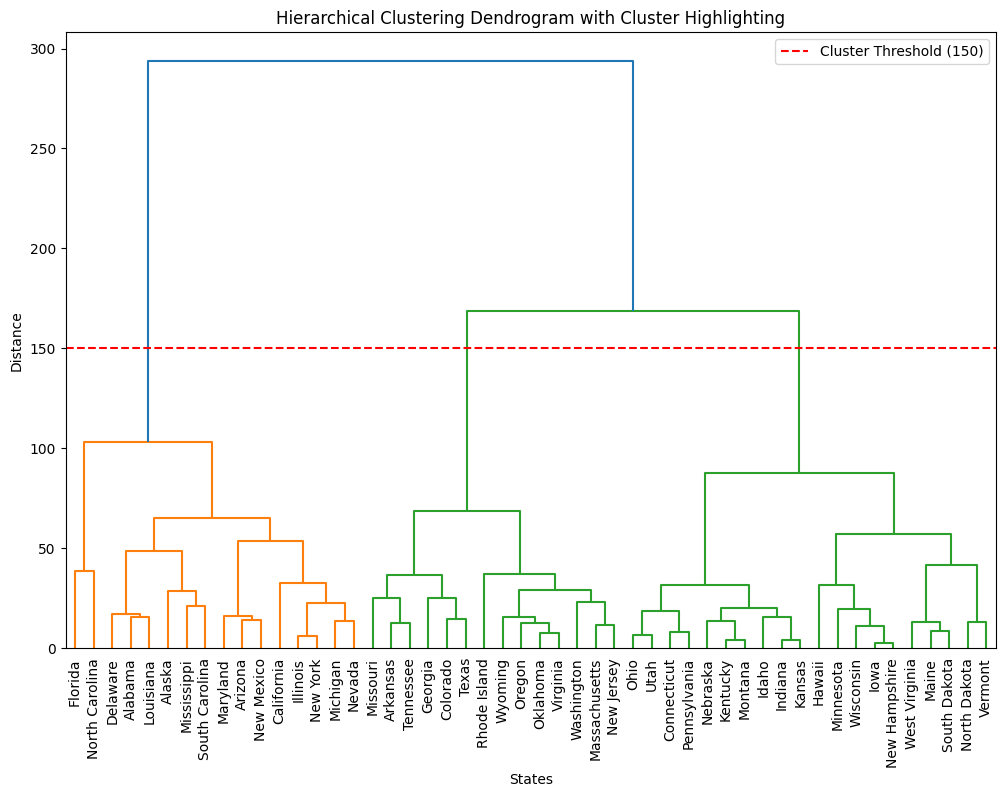

In [15]:
# Assign clusters based on a distance threshold
threshold = 150
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Add the cluster labels to the DataFrame
USArrests['Cluster'] = clusters

# Plot the dendrogram and highlight the clusters
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=USArrests.index, leaf_rotation=90, leaf_font_size=10)
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Cluster Threshold ({threshold})')
plt.title('Hierarchical Clustering Dendrogram with Cluster Highlighting')
plt.xlabel('States')
plt.ylabel('Distance')
plt.legend()
plt.show()

In [19]:
# Assign clusters
US_clusters_3 = fcluster(linkage_matrix, 3, criterion='maxclust')

# Print the cluster assignments
print(US_clusters_3)

[1 1 1 2 1 2 3 1 1 2 3 3 1 3 3 3 3 1 3 1 2 1 3 1 2 3 3 1 3 2 1 1 1 3 3 2 2
 3 2 1 3 2 2 3 3 2 2 3 3 2]


(c)  Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

In [21]:
# Select numerical columns to scale
numerical_cols = ['Murder', 'Assault', 'UrbanPop', 'Rape']

# Create a DataFrame with only the numerical columns
USArrests_scaled = pd.DataFrame(StandardScaler().fit_transform(USArrests[numerical_cols]), columns=numerical_cols)

# Confirm scaling worked for 'Murder'
print(USArrests_scaled['Murder'].std())

1.0101525445522108


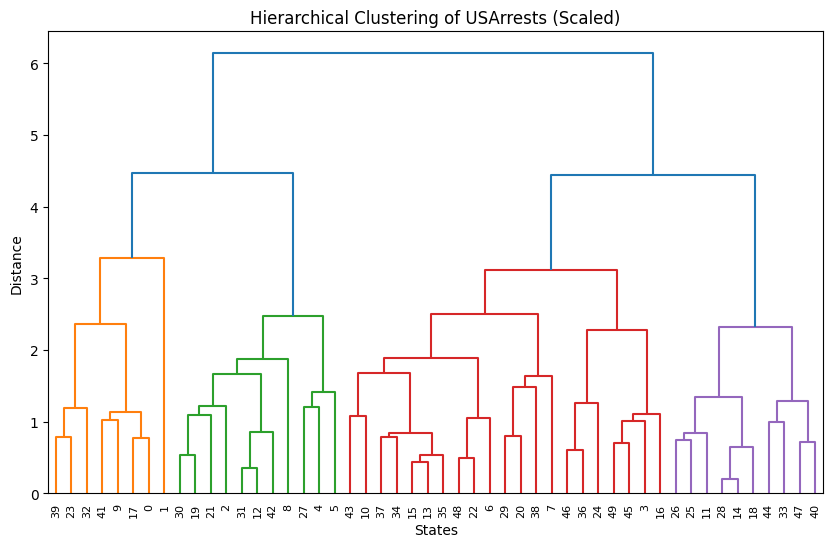

In [22]:
# Perform hierarchical clustering
US_cluster_scaled = linkage(USArrests_scaled, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(US_cluster_scaled, labels=USArrests_scaled.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering of USArrests (Scaled)')
plt.xlabel('States')
plt.ylabel('Distance')
plt.show()

(d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

In [23]:
# Cut the hierarchical clustering to obtain clusters
k = 3  # Number of clusters
US_clusters_3_scaled = fcluster(US_cluster_scaled, k, criterion='maxclust')

# Print cluster assignments
print(US_clusters_3_scaled)

[3 3 2 1 2 2 1 1 2 3 1 1 2 1 1 1 1 3 1 2 1 2 1 3 1 1 1 2 1 1 2 2 3 1 1 1 1
 1 1 3 1 3 2 1 1 1 1 1 1 1]


In [24]:
# Create a Pandas Series with cluster assignments
cluster_counts = pd.Series(US_clusters_3_scaled)

# Print the frequency table
print(cluster_counts.value_counts())

1    31
2    11
3     8
dtype: int64


In [25]:
# Create a contingency table
contingency_table = pd.crosstab(US_clusters_3, US_clusters_3_scaled)

# Print the contingency table
print(contingency_table)

col_0   1  2  3
row_0          
1       1  9  6
2      10  2  2
3      20  0  0


In [26]:
same_membership = (6 + 2 + 20) / 50
print(same_membership)

0.56


Scaling of the variables does indeed change the cluster membership of certain states! It appears as though only 56% of states were assigned to the same membership when comparing scaled and non-scaled data.Scaling maybe useful for this dataset, given UrbanPop is recorded as a different unit (Percent), compared to Murder, Assault and Rape which are reported as per 100,000.